# Project Title : Predicting Car Price  

## Problem Description 
A model to predict the price of a used car should be developed in order to assess its value based on a variety of characteristics. Several factors affect the price of a used car, such as company, model, year, transmission, distance driven, fuel type, seller type, and owner type. As a result, We will find out the price of cars from this variable.

# Data Set Description

# Importing Libraries

In [167]:
import pandas as pd # For data Analysis
import numpy as np # For Nueric Operation
import seaborn as sns
import matplotlib.pyplot as plt # For Data Visualization

from statsmodels.stats.outliers_influence import variance_inflation_factor # For VIF
from sklearn.linear_model import LinearRegression # Linear regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split #splitting & Hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor # RF 
from sklearn.tree import DecisionTreeRegressor,plot_tree# Descion Tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler# for Scaling
from sklearn.impute import KNNImputer # fill the missing value by Knn Imputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score #Evaluation Matrics 

import datetime
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [85]:
car_data=pd.read_csv("Car details v3.csv")
car_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
name,Maruti Swift Dzire VDI,Skoda Rapid 1.5 TDI Ambition,Honda City 2017-2020 EXi,Hyundai i20 Sportz Diesel,Maruti Swift VXI BSIII,Hyundai Xcent 1.2 VTVT E Plus,Maruti Wagon R LXI DUO BSIII,Maruti 800 DX BSII,Toyota Etios VXD,Ford Figo Diesel Celebration Edition
year,2014,2014,2006,2010,2007,2017,2007,2001,2011,2013
selling_price,450000,370000,158000,225000,130000,440000,96000,45000,350000,200000
km_driven,145500,120000,140000,127000,120000,45000,175000,5000,90000,169000
fuel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,LPG,Petrol,Diesel,Diesel
seller_type,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual
owner,First Owner,Second Owner,Third Owner,First Owner,First Owner,First Owner,First Owner,Second Owner,First Owner,First Owner
mileage,23.4 kmpl,21.14 kmpl,17.7 kmpl,23.0 kmpl,16.1 kmpl,20.14 kmpl,17.3 km/kg,16.1 kmpl,23.59 kmpl,20.0 kmpl
engine,1248 CC,1498 CC,1497 CC,1396 CC,1298 CC,1197 CC,1061 CC,796 CC,1364 CC,1399 CC


In [86]:
car_data.shape

(8128, 13)

In [87]:
df=car_data.drop_duplicates()
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6922,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
6923,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6924,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


# EDA

In [88]:
df.info() # Understanding the data set & checking the null values data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [89]:
df.isna().mean()*100 # checking the null values so find out that last 5 column has  upto 2.7 % null values

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.959861
torque           3.017615
seats            3.003176
dtype: float64

<AxesSubplot:>

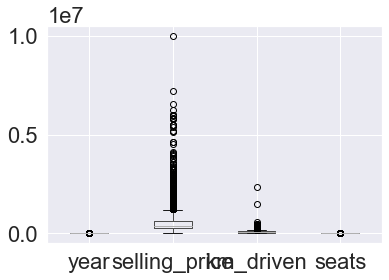

In [90]:
df.boxplot() # we visualize outlier but selling price is not outlier

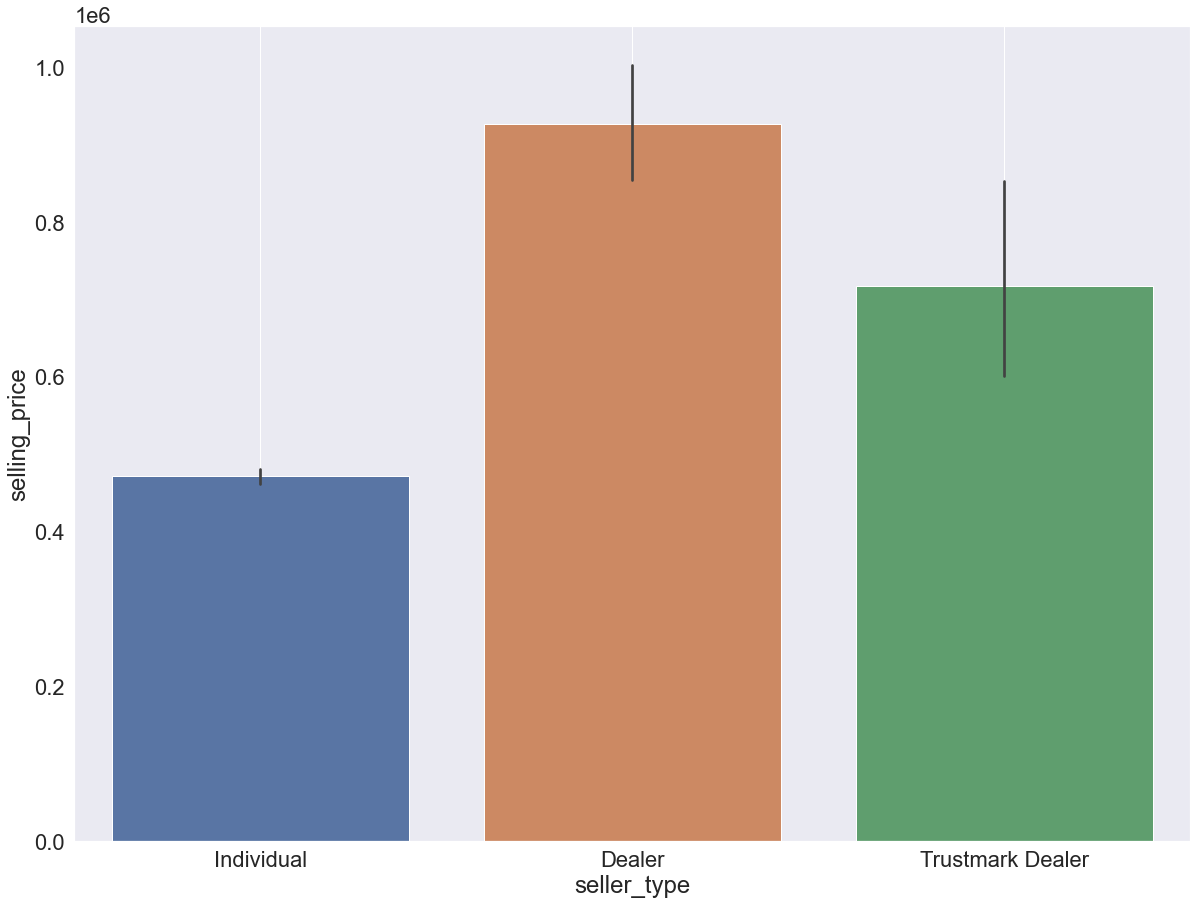

In [91]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='seller_type', y='selling_price', data=df)
plt.grid()

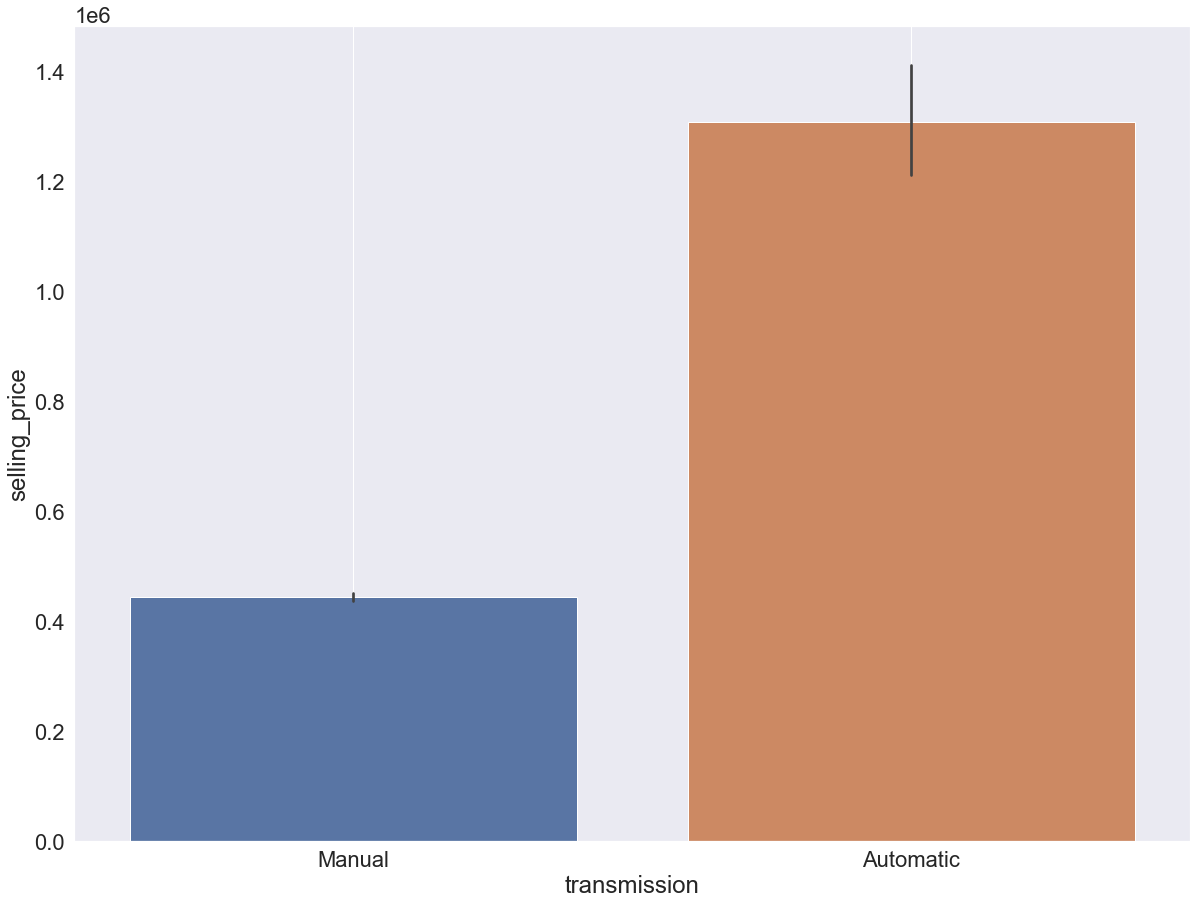

In [92]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='transmission', y='selling_price', data=df)
plt.grid()

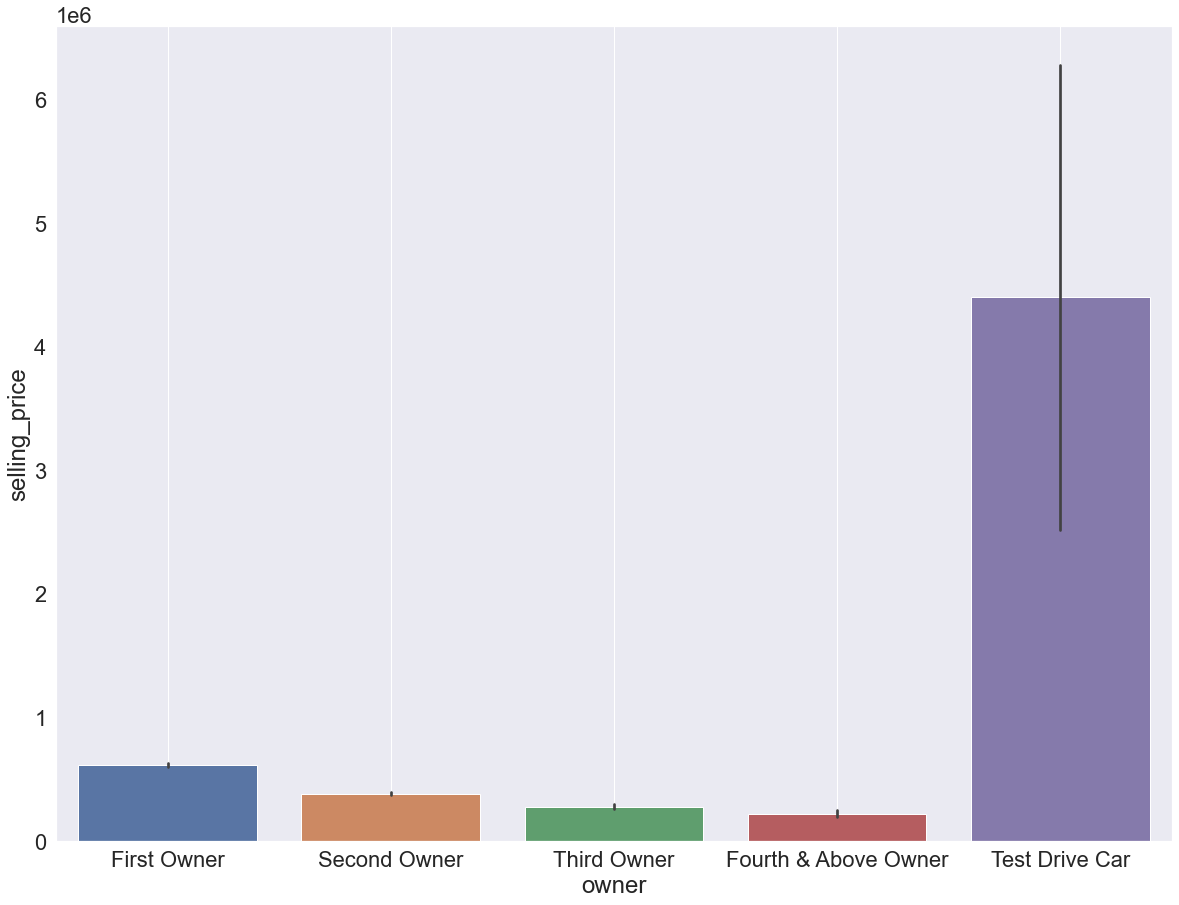

In [93]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='owner', y='selling_price', data=df)
plt.grid()

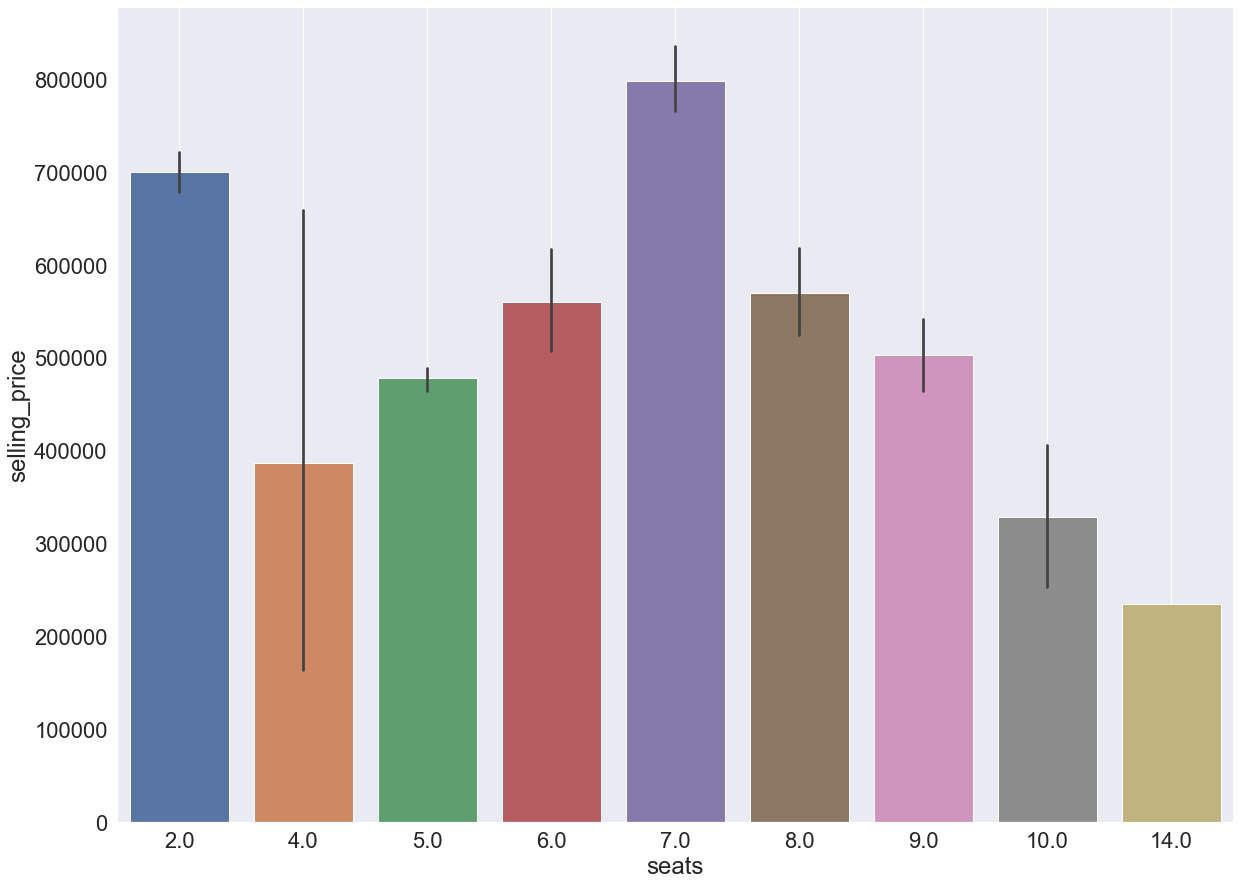

In [94]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='seats', y='selling_price', data=df,hue_order="seats")
plt.grid()

# converting all features into either numerical data type 

# 1.Processing Name column

In [95]:
df["name"].value_counts()

Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Mahindra KUV 100 G80 K4 Plus                      1
Hyundai Getz 1.1 GVS                              1
Maruti 800 EX BSII                                1
Datsun GO T Option                                1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 2058, dtype: int64

In [96]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
df['Brand'] = df['name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['name'].str.split(' ').str[1] + df['name'].str.split(' ').str[2]


In [97]:
df.Brand.value_counts()

Maruti           2165
Hyundai          1267
Mahindra          723
Tata              647
Honda             362
Ford              361
Toyota            357
Chevrolet         216
Renault           206
Volkswagen        174
Nissan             73
Skoda              70
Datsun             57
BMW                47
Mercedes-Benz      46
Fiat               44
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Kia                 3
Land                3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Peugeot             1
Name: Brand, dtype: int64

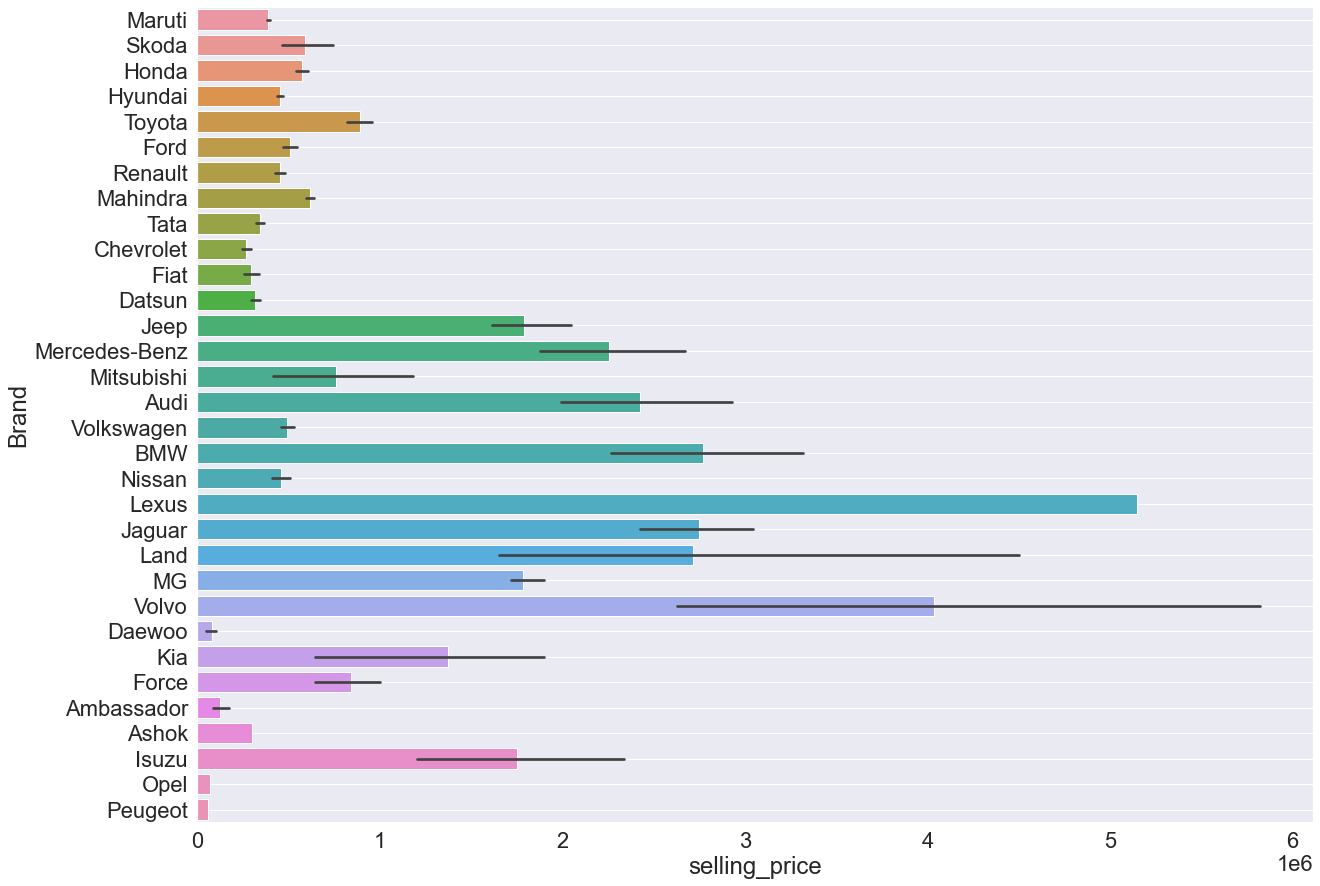

In [98]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='selling_price', y='Brand', data=df,hue_order=df.Brand.value_counts())
plt.grid()

In [99]:
# we cannot do encoding because could not find that much importance because nearly equall price some car brand has high price 

In [100]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Brand', 'Model'],
      dtype='object')

# Processing year Column
1)year Is not significant unless we converting it into  no of years
2)As no of year increases the price of car decrease

In [101]:
current_time=datetime.datetime.now()
df["year"]=current_time.year-df["year"]

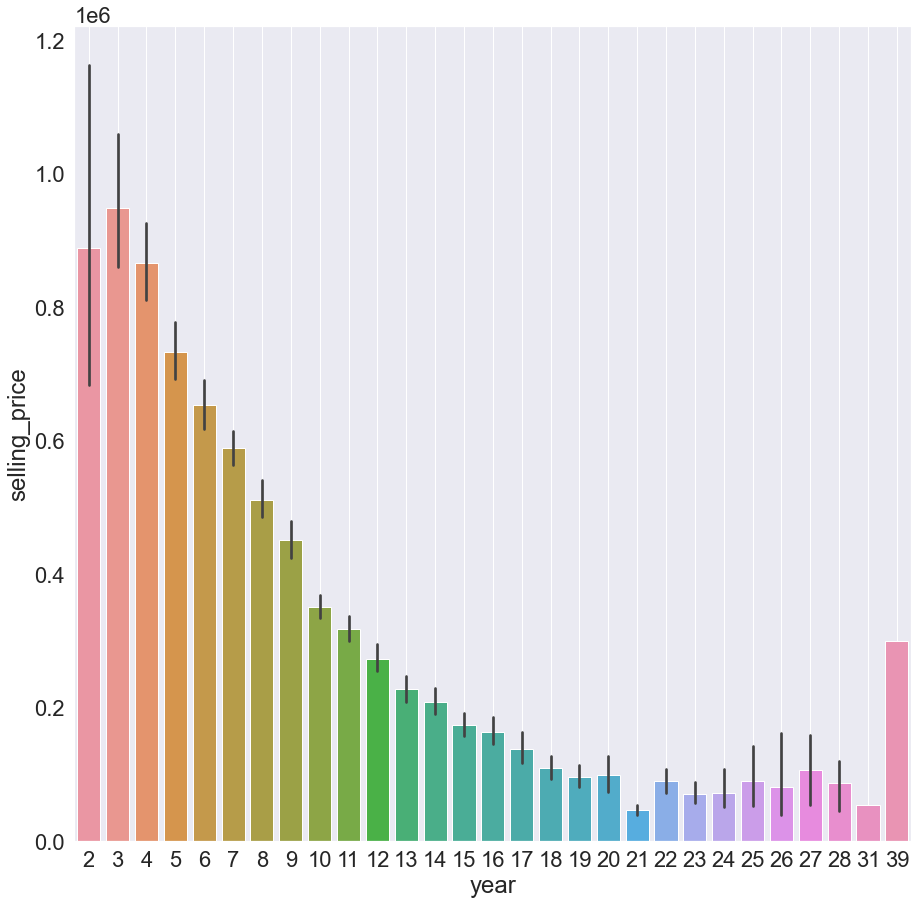

In [102]:
plt.figure(figsize=(15,15))
sns.set(font_scale=2)
sns.barplot(x='year', y='selling_price', data=df)
plt.grid()

In [103]:
df["year"].value_counts()

5     808
6     693
7     681
4     608
10    604
8     581
9     562
11    554
12    380
3     347
13    240
14    205
15    176
16    123
17     91
2      63
18     60
19     47
20     26
22     20
23     17
25     11
24     10
21      9
26      3
28      3
27      2
39      1
31      1
Name: year, dtype: int64

# 3.Km_Driven

In [104]:

df["km_driven"].value_counts()

120000    513
70000     434
80000     423
60000     394
50000     357
         ... 
87237       1
62960       1
26634       1
163720      1
191000      1
Name: km_driven, Length: 921, dtype: int64

In [105]:
cat_col=["fuel","seller_type","transmission",'owner'] # all columns need encoding 

In [106]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Brand', 'Model'],
      dtype='object')

In [107]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand,Model
0,Maruti Swift Dzire VDI,8,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,SwiftDzire
1,Skoda Rapid 1.5 TDI Ambition,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid1.5
2,Honda City 2017-2020 EXi,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City2017-2020
3,Hyundai i20 Sportz Diesel,12,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20Sportz
4,Maruti Swift VXI BSIII,15,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,SwiftVXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,9,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,Maruti,WagonR
8122,Hyundai i20 Magna 1.4 CRDi,8,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,Hyundai,i20Magna
8123,Hyundai i20 Magna,9,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai,i20Magna
8124,Hyundai Verna CRDi SX,15,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,VernaCRDi


In [108]:
df["mileage"] = df["mileage"].str.rstrip("kmpl")

In [109]:
df["mileage"] = df["mileage"].str.rstrip("km/kg")

In [110]:
df["mileage"] =df["mileage"].astype(float)

In [111]:
df["engine"] = df["engine"].str.rstrip(" CC")

In [112]:
df["engine"] =df["engine"].astype(float)

In [113]:
df["max_power"] = df["max_power"].str.rstrip("bhp")

In [114]:
df["max_power"].describe

<bound method NDFrame.describe of 0           74 
1       103.52 
2           78 
3           90 
4         88.2 
         ...   
8121      67.1 
8122     88.73 
8123     82.85 
8124       110 
8125      73.9 
Name: max_power, Length: 6926, dtype: object>

In [115]:
df["max_power"].loc[df['max_power'] == " "]=np.nan

In [116]:
df["max_power"] =df["max_power"].astype(float)

In [117]:
df.drop(["torque","name","Brand","Model"],axis=1,inplace=True)# not finding any relevent information
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,8,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,12,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,15,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,9,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,8,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,9,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,15,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [118]:
df["owner"].value_counts()

First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: owner, dtype: int64

In [119]:
# Label Encoding for owner column because the price will depend on ordinal value

In [120]:
df.replace({"Fourth & Above Owner":0,"Third Owner":1,"Second Owner":2,"First Owner":3,"Test Drive Car":4},inplace=True)

In [121]:
df=pd.get_dummies(df,drop_first=True)
df

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,8,450000,145500,3,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,8,370000,120000,2,21.14,1498.0,103.52,5.0,1,0,0,1,0,1
2,16,158000,140000,1,17.70,1497.0,78.00,5.0,0,0,1,1,0,1
3,12,225000,127000,3,23.00,1396.0,90.00,5.0,1,0,0,1,0,1
4,15,130000,120000,3,16.10,1298.0,88.20,5.0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,9,260000,50000,2,18.90,998.0,67.10,5.0,0,0,1,1,0,1
8122,8,475000,80000,2,22.54,1396.0,88.73,5.0,1,0,0,1,0,1
8123,9,320000,110000,3,18.50,1197.0,82.85,5.0,0,0,1,1,0,1
8124,15,135000,119000,0,16.80,1493.0,110.00,5.0,1,0,0,1,0,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6926 non-null   int64  
 1   selling_price                 6926 non-null   int64  
 2   km_driven                     6926 non-null   int64  
 3   owner                         6926 non-null   int64  
 4   mileage                       6718 non-null   float64
 5   engine                        6718 non-null   float64
 6   max_power                     6720 non-null   float64
 7   seats                         6718 non-null   float64
 8   fuel_Diesel                   6926 non-null   uint8  
 9   fuel_LPG                      6926 non-null   uint8  
 10  fuel_Petrol                   6926 non-null   uint8  
 11  seller_type_Individual        6926 non-null   uint8  
 12  seller_type_Trustmark Dealer  6926 non-null   uint8  
 13  tra

In [123]:
from sklearn.impute import KNNImputer
knn_im=KNNImputer()
knn_im.fit(df)
t=knn_im.transform(df)
df=pd.DataFrame(t,columns=df.columns)
df
# null value fill by Knn imputer 

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,8.0,450000.0,145500.0,3.0,23.40,1248.0,74.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0
1,8.0,370000.0,120000.0,2.0,21.14,1498.0,103.52,5.0,1.0,0.0,0.0,1.0,0.0,1.0
2,16.0,158000.0,140000.0,1.0,17.70,1497.0,78.00,5.0,0.0,0.0,1.0,1.0,0.0,1.0
3,12.0,225000.0,127000.0,3.0,23.00,1396.0,90.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0
4,15.0,130000.0,120000.0,3.0,16.10,1298.0,88.20,5.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,9.0,260000.0,50000.0,2.0,18.90,998.0,67.10,5.0,0.0,0.0,1.0,1.0,0.0,1.0
6922,8.0,475000.0,80000.0,2.0,22.54,1396.0,88.73,5.0,1.0,0.0,0.0,1.0,0.0,1.0
6923,9.0,320000.0,110000.0,3.0,18.50,1197.0,82.85,5.0,0.0,0.0,1.0,1.0,0.0,1.0
6924,15.0,135000.0,119000.0,0.0,16.80,1493.0,110.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0


In [124]:
df.isna().sum()# no null value in the data

year                            0
selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

In [125]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925
year,8.0,8.00,16.0,12.0,15.0,5.00,15.0,21.0,11.00,9.0,...,25.0,5.00,9.00,5.00,14.00,9.0,8.00,9.00,15.0,13.0
selling_price,450000.0,370000.00,158000.0,225000.0,130000.0,440000.00,96000.0,45000.0,350000.00,200000.0,...,40000.0,340000.00,380000.00,360000.00,120000.00,260000.0,475000.00,320000.00,135000.0,382000.0
km_driven,145500.0,120000.00,140000.0,127000.0,120000.0,45000.00,175000.0,5000.0,90000.00,169000.0,...,120000.0,45000.00,25000.00,80000.00,191000.00,50000.0,80000.00,110000.00,119000.0,120000.0
owner,3.0,2.00,1.0,3.0,3.0,3.00,3.0,2.0,3.00,3.0,...,3.0,3.00,3.00,3.00,3.00,2.0,2.00,3.00,0.0,3.0
mileage,23.4,21.14,17.7,23.0,16.1,20.14,17.3,16.1,23.59,20.0,...,16.1,23.95,18.50,20.51,17.92,18.9,22.54,18.50,16.8,19.3
engine,1248.0,1498.00,1497.0,1396.0,1298.0,1197.00,1061.0,796.0,1364.00,1399.0,...,796.0,998.00,1197.00,998.00,1086.00,998.0,1396.00,1197.00,1493.0,1248.0
max_power,74.0,103.52,78.0,90.0,88.2,81.86,57.5,37.0,67.10,68.1,...,37.0,67.10,82.85,67.04,62.10,67.1,88.73,82.85,110.0,73.9
seats,5.0,5.00,5.0,5.0,5.0,5.00,5.0,4.0,5.00,5.0,...,4.0,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.0,5.0
fuel_Diesel,1.0,1.00,0.0,1.0,0.0,0.00,0.0,0.0,1.00,1.0,...,0.0,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.0,1.0
fuel_LPG,0.0,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0


# 5. Feature Selection

In [126]:
df.corr()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
year,1.000000,-0.433076,0.377003,-0.495067,-0.362797,-0.002736,-0.179602,-0.037431,-0.066855,0.069007,0.060799,0.150698,-0.046392,0.140995
selling_price,-0.433076,1.000000,-0.165620,0.254383,-0.100552,0.444999,0.694016,0.161760,0.256397,-0.045282,-0.243568,-0.260673,0.024175,-0.462683
km_driven,0.377003,-0.165620,1.000000,-0.260523,-0.199743,0.252525,0.038914,0.206900,0.274241,0.019320,-0.276549,0.126940,-0.040375,0.118658
owner,-0.495067,0.254383,-0.260523,1.000000,0.191570,-0.024143,0.072495,-0.006110,-0.008350,-0.027700,0.012613,-0.171004,0.033764,-0.089598
mileage,-0.362797,-0.100552,-0.199743,0.191570,1.000000,-0.571578,-0.369153,-0.454788,0.076713,-0.018138,-0.091220,-0.006895,-0.008362,0.170732
engine,-0.002736,0.444999,0.252525,-0.024143,-0.571578,1.000000,0.685057,0.659640,0.535629,-0.060009,-0.517131,-0.070974,-0.004323,-0.218648
max_power,-0.179602,0.694016,0.038914,0.072495,-0.369153,0.685057,1.000000,0.263184,0.330939,-0.066657,-0.308887,-0.193052,0.019141,-0.437848
seats,-0.037431,0.161760,0.206900,-0.006110,-0.454788,0.659640,0.263184,1.000000,0.361008,-0.034288,-0.350436,0.036674,-0.022772,0.018137
fuel_Diesel,-0.066855,0.256397,0.274241,-0.008350,0.076713,0.535629,0.330939,0.361008,1.000000,-0.080826,-0.972964,-0.024060,-0.054125,0.019421
fuel_LPG,0.069007,-0.045282,0.019320,-0.027700,-0.018138,-0.060009,-0.066657,-0.034288,-0.080826,1.000000,-0.066410,0.012159,-0.004647,0.022539


# Assumption on linear Regression
# 1. Linearity

<AxesSubplot:>

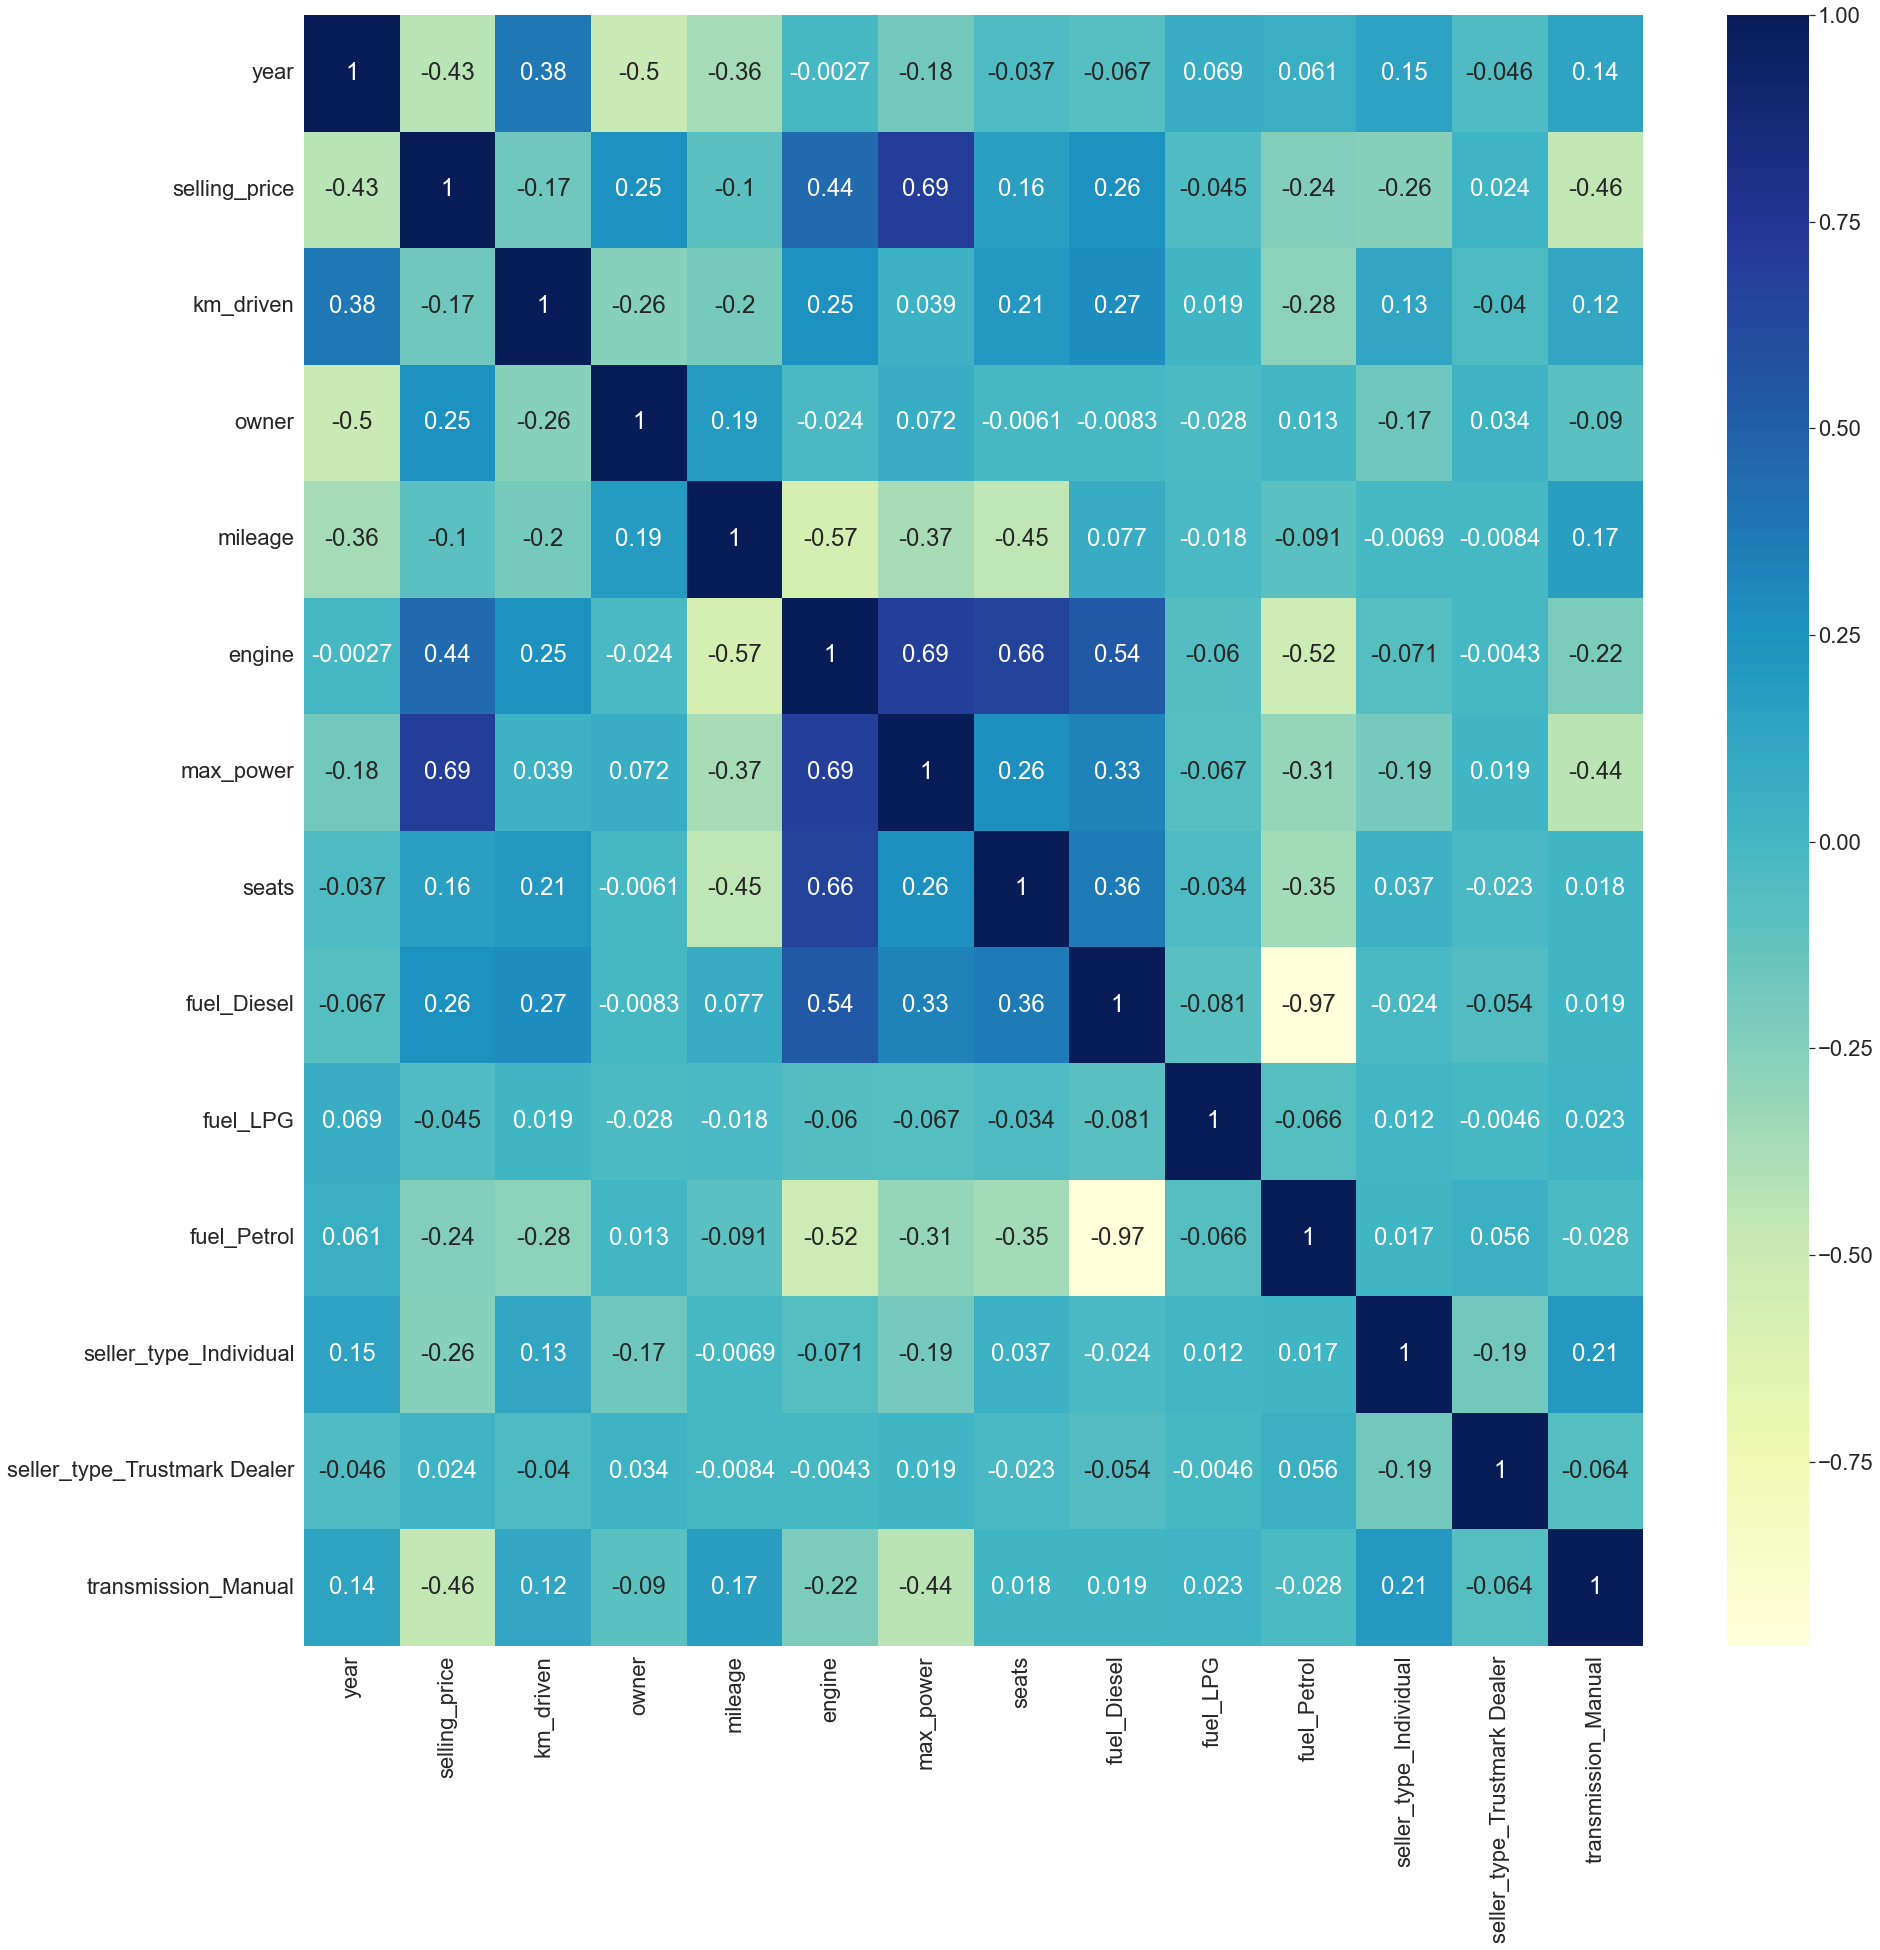

In [127]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

In [128]:
# year=-0.43,engine=0.44,max_power=0.69,max_power=-0.46 this feature has r value  -0.3 > R > 0.3  

# 2.No Multicolinearity (VIF)

In [129]:
vif_df = pd.DataFrame()
vif_df['Features'] = df.columns
vif_df

,Features
0,year
1,selling_price
2,km_driven
3,owner
4,mileage
5,engine
6,max_power
7,seats
8,fuel_Diesel
9,fuel_LPG


In [130]:
vif_list = []
for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
vif_list

[8.797217208873407,
 5.246736610780397,
 3.59211618439596,
 15.717711470889778,
 35.60809755686161,
 49.627108289194666,
 27.520243909773765,
 59.27440549981041,
 54.102880400314355,
 1.4535511758334867,
 37.24995250991194,
 10.916949506041407,
 1.0448863959495958,
 16.377071252328793]

In [131]:
vif_df["VIF"] = vif_list
vif_df

,Features,VIF
0,year,8.797217
1,selling_price,5.246737
2,km_driven,3.592116
3,owner,15.717711
4,mileage,35.608098
5,engine,49.627108
6,max_power,27.520244
7,seats,59.274405
8,fuel_Diesel,54.102880
9,fuel_LPG,1.453551


# Model Training

In [132]:
x = df.drop("selling_price",axis = 1)
y = df['selling_price']
x

,year,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,8.0,145500.0,3.0,23.40,1248.0,74.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0
1,8.0,120000.0,2.0,21.14,1498.0,103.52,5.0,1.0,0.0,0.0,1.0,0.0,1.0
2,16.0,140000.0,1.0,17.70,1497.0,78.00,5.0,0.0,0.0,1.0,1.0,0.0,1.0
3,12.0,127000.0,3.0,23.00,1396.0,90.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0
4,15.0,120000.0,3.0,16.10,1298.0,88.20,5.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,9.0,50000.0,2.0,18.90,998.0,67.10,5.0,0.0,0.0,1.0,1.0,0.0,1.0
6922,8.0,80000.0,2.0,22.54,1396.0,88.73,5.0,1.0,0.0,0.0,1.0,0.0,1.0
6923,9.0,110000.0,3.0,18.50,1197.0,82.85,5.0,0.0,0.0,1.0,1.0,0.0,1.0
6924,15.0,119000.0,0.0,16.80,1493.0,110.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0


# preprocessing

In [133]:
normal_scaler=MinMaxScaler()
normal_scaler.fit(x)
normalized_array=normal_scaler.transform(x)
x_df=pd.DataFrame(normalized_array,columns=x.columns)
x_df



,year,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.162162,0.061640,0.75,0.557143,0.209396,0.185000,0.25,1.0,0.0,0.0,1.0,0.0,1.0
1,0.162162,0.050837,0.50,0.503333,0.293289,0.258800,0.25,1.0,0.0,0.0,1.0,0.0,1.0
2,0.378378,0.059310,0.25,0.421429,0.292953,0.195000,0.25,0.0,0.0,1.0,1.0,0.0,1.0
3,0.270270,0.053803,0.75,0.547619,0.259060,0.225000,0.25,1.0,0.0,0.0,1.0,0.0,1.0
4,0.351351,0.050837,0.75,0.383333,0.226174,0.220500,0.25,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,0.189189,0.021182,0.50,0.450000,0.125503,0.167750,0.25,0.0,0.0,1.0,1.0,0.0,1.0
6922,0.162162,0.033891,0.50,0.536667,0.259060,0.221825,0.25,1.0,0.0,0.0,1.0,0.0,1.0
6923,0.189189,0.046601,0.75,0.440476,0.192282,0.207125,0.25,0.0,0.0,1.0,1.0,0.0,1.0
6924,0.351351,0.050414,0.00,0.400000,0.291611,0.275000,0.25,1.0,0.0,0.0,1.0,0.0,1.0


# Train Test Split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size=0.2, random_state=2)

# Train Model

In [135]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6926 non-null   float64
 1   selling_price                 6926 non-null   float64
 2   km_driven                     6926 non-null   float64
 3   owner                         6926 non-null   float64
 4   mileage                       6926 non-null   float64
 5   engine                        6926 non-null   float64
 6   max_power                     6926 non-null   float64
 7   seats                         6926 non-null   float64
 8   fuel_Diesel                   6926 non-null   float64
 9   fuel_LPG                      6926 non-null   float64
 10  fuel_Petrol                   6926 non-null   float64
 11  seller_type_Individual        6926 non-null   float64
 12  seller_type_Trustmark Dealer  6926 non-null   float64
 13  tra

In [137]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000
mean,8.579700,5.172707e+05,7.399568e+04,2.487727,19.429818,1427.236327,87.302629,5.428790,0.542160,0.005487,0.444268,0.897776,0.003898,0.915680
std,4.078286,5.197670e+05,5.835810e+04,0.743342,4.005701,489.530813,31.550233,0.974522,0.498255,0.073873,0.496920,0.302964,0.062319,0.277887
min,2.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,624.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.500000e+05,4.000000e+04,2.000000,16.800000,1196.000000,67.100000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,8.000000,4.000000e+05,7.000000e+04,3.000000,19.300000,1248.000000,81.830000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,11.000000,6.335000e+05,1.000000e+05,3.000000,22.320000,1498.000000,99.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,39.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
# 1. Testing Data Evaluation
y_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 119636157512.3085
RMSE : 345884.6014385557
MAE : 173555.63064598574
R-Squared : 0.6247504547853344


In [139]:
# 1. Training Data Evaluation
y_pred_train = linear_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 98328103299.52707
RMSE : 313573.1227314086
MAE : 170097.0006865616
R-Squared : 0.6187865414055007


# 3. Normality of Residuals

In [140]:
residual_train_data  = y_train - y_pred_train

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

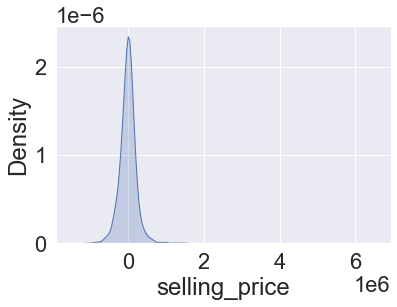

In [141]:
sns.kdeplot(residual_train_data,fill=True)

In [142]:
import scipy.stats as sts
import statsmodels.api as sm

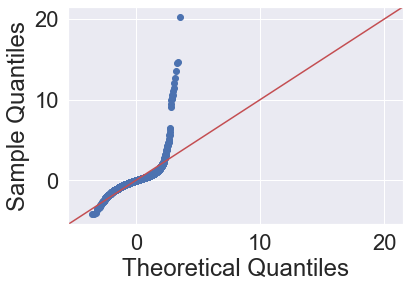

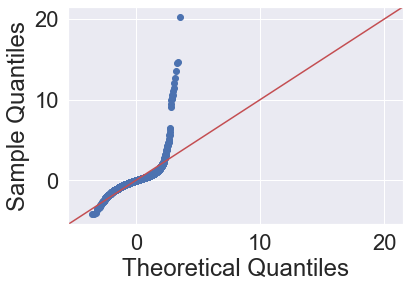

In [143]:
sm.qqplot(residual_train_data,line='45',fit = True)

# 4. Homoscedasticity

In [144]:
residual_train_data

549    -148081.568630
798    -175492.387103
3120    209861.035762
4964   -202288.097261
5010    -93335.233548
            ...      
6443   -106766.246229
3606   -124854.114479
5704     77677.099365
6637     85826.902780
2575   -245359.880085
Name: selling_price, Length: 5540, dtype: float64

<AxesSubplot:xlabel='selling_price', ylabel='selling_price'>

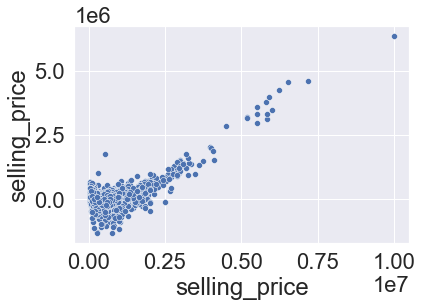

In [145]:
sns.scatterplot(x = y_train,y = residual_train_data)

# KNN_ALOGORITHM

In [146]:
knn_regresor_model=KNeighborsRegressor()
knn_regresor_model.fit(x_train,y_train)

KNeighborsRegressor()

In [147]:
# 1. Training Data Evaluation
y_pred_train = knn_regresor_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 37969985519.58019
RMSE : 194858.88617042897
MAE : 81555.20169675091
R-Squared : 0.8527921416463258


In [148]:
# 2. Testing Data Evaluation
y_pred = knn_regresor_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 45391973669.07377
RMSE : 213053.92197533883
MAE : 101955.26060606059
R-Squared : 0.8576240007209897


# Hyperparameters

In [149]:
knn_clf=KNeighborsRegressor(p=2,n_neighbors=2)
hyperparameters={"n_neighbors":np.arange(2,20),
                "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=2)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_params_

{'n_neighbors': 3, 'p': 1}

# KNN after Hyperparameter Tuning¶

In [150]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)


# 1. Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 25773700349.736362
RMSE : 160541.89593291952
MAE : 66801.43279181707
R-Squared : 0.9000765689421316


In [151]:
# 2. Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 34888261624.74275
RMSE : 186783.997239439
MAE : 95365.40572390573
R-Squared : 0.8905698362414551


# Descion Tree

In [152]:
# Train Model
dt_clf=DecisionTreeRegressor()
dt_clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [153]:
# 1. Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 232877961.37409747
RMSE : 15260.339490787794
MAE : 3744.8249699157645
R-Squared : 0.9990971430333053


In [154]:
# 2. Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 50995900259.06687
RMSE : 225822.7186513059
MAE : 102499.7827080327
R-Squared : 0.8400467820269261


# Decision Tree After Hyper parameter Tuning

In [155]:
dt_clf = DecisionTreeRegressor()

hyperparameters = {
                    "criterion" : ["squared_error","absolute_error"],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(2,20),
                    "min_samples_leaf": np.arange(2,10)
                    }

gscv_dt_model = RandomizedSearchCV(dt_clf,hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=4)

In [156]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=4)

In [157]:
# 1. Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 30861536776.755676
RMSE : 175674.51942941433
MAE : 100539.16409823396
R-Squared : 0.8803512650257238


In [158]:
# 2. Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 38561116712.02004
RMSE : 196369.84674847624
MAE : 103637.19328732308
R-Squared : 0.8790495966266182


# Random_Forest

In [159]:
rf_clr=RandomForestRegressor(random_state=20)
rf_clr.fit(x_train,y_train)

RandomForestRegressor(random_state=20)

In [160]:
# 1. Training Data Evaluation
y_pred_train = rf_clr.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 4020418912.4236503
RMSE : 63406.77339546344
MAE : 30865.52819122348
R-Squared : 0.9844130238744153


In [161]:
# 2. Testing Data Evaluation
y_pred = rf_clr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 28297160088.205368
RMSE : 168217.5974391662
MAE : 78451.22199599817
R-Squared : 0.9112434177529215


# Random Forest with Hyperparameter tuning

In [162]:
rf_clr1=RandomForestRegressor(random_state=20)
Hyper={"n_estimators":np.arange(0,150),
    "criterion":["squared_error", "absolute_error"],
    "max_depth":np.arange(0,15),
    "min_samples_split":np.arange(0,15),
    "min_samples_leaf":np.arange(5,35),
    "max_features":['auto'],
    }
rscv_rf_clr=RandomizedSearchCV(rf_clr1,Hyper,cv=5)
rscv_rf_clr.fit(x_train,y_train)
rscv_rf_clr.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=7, n_estimators=73, random_state=20)

In [163]:
rf_clr1=rscv_rf_clr.best_estimator_
rf_clr1.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=7, n_estimators=73, random_state=20)

In [164]:
# 1. Training Data Evaluation
y_pred_train = rf_clr1.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 30759077162.485657
RMSE : 175382.6592411167
MAE : 79911.0577889323
R-Squared : 0.8807484961591583


In [165]:
# 2. Testing Data Evaluation
y_pred = rf_clr1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 37545533162.08851
RMSE : 193766.69776328572
MAE : 87581.73483365949
R-Squared : 0.8822350655781773


In [ ]:
#Car Price Prediction Dtatset
# linear Regression
Training Accuracy=62.47
Testing Aaccuracy=61.87
#knn with standerdization 
Training Accuracy=85.27
Testing Aaccuracy=85.76
#knn with normalization with hyperparameter
Training Accuracy=90.00
Testing Aaccuracy=89.05
#Decision Tree 
Training Accuracy=99.09
Testing Aaccuracy=84.04
# Descision tree with hyperparameters
Training Accuracy=88.03
Testing Aaccuracy=87.90
# Random Forest
Training Accuracy=98.44
Testing Aaccuracy=91.22
# Random Forest with hyperparameters
Training Accuracy=88.076
Testing Aaccuracy=88.23

# so Knn  model is high R-squareed value so among all the alogoithm 

# pickle file Creation

In [169]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(knn_clf,f)# For prediction

In [171]:
import pickle
with open('stdscal.pkl','wb') as f:
    pickle.dump(normal_scaler,f) # For Sclaing